 # Work with local NetCDF files.

 This package provides tools for working with SILO weather data.

 The function `read_silo_xarray` reads SILO data from a directory containing the SILO netCDF files and returns a merged xarray dataset.

 xarray uses lazy loading, so the data is not loaded into memory until you call a method that requires it.

 The `.compute()` method loads the data into memory.

 This can be faster than making multiple reads from disk, however it can also use a lot of memory.

In [4]:
import matplotlib.pyplot as plt
import xarray as xr

plt.style.use("seaborn-v0_8-bright")
from weather_tools.read_silo_xarray import read_silo_xarray

# read a subset into memory to speed things up

ds = (
    read_silo_xarray()
    .sel(lat=slice(-39, -26), lon=slice(133, 154), time=slice("2020-01-01", "2025-01-01"))
    .compute()
)

 `read_silo_xarray` opens the netCDF files in the directory and merges them into a single xarray dataset.

 the dataset contains the following variables:

 - `min_temp`: minimum temperature in degrees Celsius

 - `max_temp`: maximum temperature in degrees Celsius

 - `daily_rain`: rainfall in mm

 - `evap_syn`: evaporation in mm (synthetic estimate)

 Others can be added by downloading the SILO data from the SILO website and adding them to the directory.

 the dataset object can then be subset to get the sepcific data you require.

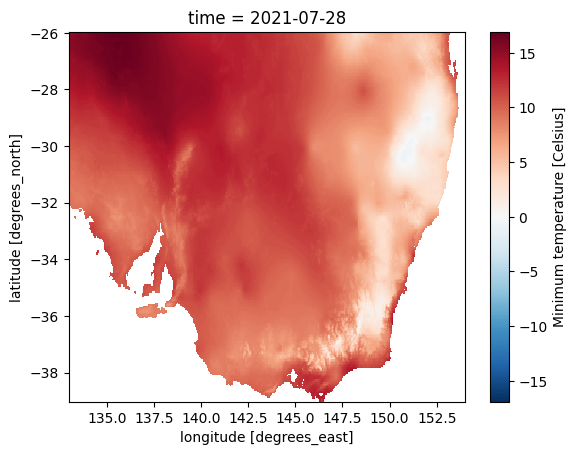

In [5]:
# plot raster of minimum temperature for a specific date
ds.sel(time="2021-07-28").min_temp.plot.imshow()

 Data for a specific location can be extracted by providing the latitude and longitude of the location.

 convert to pandas dataframe

In [6]:
# Data for a specific location can be extracted by providing the latitude and longitude of the location.
lat, lon = -36.6844306, 142.1867521
year = "2021"

ds_site = ds.sel(lat=lat, lon=lon, method="nearest").sel(time=year)

# convert to pandas dataframe
df = ds_site.to_pandas().drop(columns=["lat", "lon", "crs"])
df.head()

,daily_rain,max_temp,min_temp,evap_syn
time,,,,
2021-01-01,0.0,33.4,14.5,7.7
2021-01-02,5.3,30.5,18.0,6.4
2021-01-03,1.4,28.9,13.2,7.2
2021-01-04,2.6,23.0,13.8,6.1
2021-01-05,0.0,23.2,12.9,6.0
